In this Notebook i will explore how KAN works with images

In [1]:
import numpy as np
import os

def read_idx(filename):
    with open(filename, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        num_dims = magic_number & 0xFF
        shape = tuple(int.from_bytes(f.read(4), byteorder='big') for _ in range(num_dims))
        
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(shape)

# Load training images
train_images_path = '/Users/emirulurak/Desktop/dev/myresearchs/kan/priv__/datasets/train-images-idx3-ubyte'
train_labels = '/Users/emirulurak/Desktop/dev/myresearchs/kan/priv__/datasets/train-labels-idx1-ubyte'
train_images = read_idx(train_images_path)
train_labels = read_idx(train_labels)
print(f'Training images shape: {train_images.shape}')

Training images shape: (60000, 28, 28)


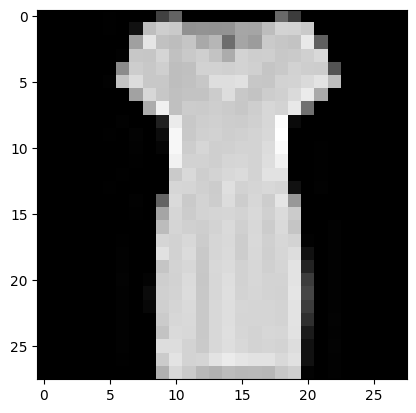

In [2]:
import matplotlib.pyplot as plt

plt.imshow(train_images[20], cmap='gray')

In [3]:
np.expand_dims(train_images[0], axis=0).shape

(1, 28, 28)

In [4]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [5]:
train_images = train_images[:10000]

In [6]:
train_images.shape

(10000, 28, 28)

In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

y_train_one_hot = encoder.fit_transform(train_labels.reshape(-1, 1))

In [8]:
from convkan import KANClassification
from kanvsmlp import CrossEntropyLoss, softmax

# Define model parameters
input_channel = 1
height = 28
width = 28
batch_size = 32  # Define your batch size
epochs = 100

# Initialize model and loss function
model = KANClassification(input_channel=input_channel, height=height, width=width)
loss_fun = CrossEntropyLoss()

# Training loop
for epoch in range(epochs):
    epoch_loss = 0
    num_batches = len(train_images) // batch_size

    for batch in range(num_batches):
        batch_start = batch * batch_size
        batch_end = (batch + 1) * batch_size
        xi_batch = np.expand_dims(train_images[batch_start:batch_end], axis=1)
        yi_batch = y_train_one_hot[batch_start:batch_end]

        preds = []
        for xi in xi_batch:
            pred = model.forward(np.expand_dims(xi, axis=0))
            preds.append(pred)
        preds = np.array(preds).reshape(batch_size, -1)

        loss = 0
        for pred, yi in zip(preds, yi_batch):
            loss += loss_fun(pred, yi)

        epoch_loss += loss
        model.backward(loss_fun.dloss_dy.squeeze())
        model.zero_grad(which=['xin'])
        print(f"Batch {batch+1}/{num_batches}: Loss = {loss / batch_size}")
    
    epoch_loss /= len(train_images)
    print(f'Epoch {epoch+1}/{epochs} Loss: {epoch_loss}')
    model.update()
    model.zero_grad(which=['weights', 'bias'])

Batch 1/312: Loss = 2.625052233958878
Batch 2/312: Loss = 2.732843979233914
Batch 3/312: Loss = 2.4986444757511377
Batch 4/312: Loss = 2.7940417148148637


KeyboardInterrupt: 

In [ ]:
24 * 24 * 2

1152